In [ ]:
import tensorflow as tf
import numpy as np
import random

import warnings
warnings.filterwarnings('ignore')

In [ ]:
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# XOR data 만들기
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

In [ ]:
deep_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 2, activation='relu', input_shape = (2,)),
    tf.keras.layers.Dense(units = 1, activation='sigmoid')
])

In [ ]:
deep_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), loss = 'binary_crossentropy', metrics = ['accuracy'])
deep_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
deep_model.fit(x,y, epochs = 500, batch_size = 1, verbose = 0)
deep_model.predict(x).round(4)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


array([[0.6608],
       [0.6608],
       [0.6608],
       [0.0126]], dtype=float32)

In [ ]:
scores = deep_model.evaluate(x,y)
print('모델 정확도 : ', scores[1]*100, '%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7500 - loss: 0.4806
모델 정확도 :  75.0 %


In [ ]:
#NOR 문제
x_1 = np.array([[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,0,1],[1,1,0],[1,1,1]])
y_1 = np.array([[0],[0],[1],[0],[1],[0],[1],[0]])


In [ ]:
deep_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 2, activation='relu', input_shape = (3,)),
    tf.keras.layers.Dense(units = 1, activation='sigmoid')
])

In [ ]:
deep_model_1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), loss = 'binary_crossentropy', metrics = ['accuracy'])
deep_model_1.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 2)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11 (44.00 B)

 Trainable params: 11 (44.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
deep_model_1.fit(x_1,y_1, epochs = 500, batch_size = 1, verbose = 0)
deep_model_1.predict(x_1).round(4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array([[2.300e-03],
       [0.000e+00],
       [9.997e-01],
       [0.000e+00],
       [9.760e-01],
       [0.000e+00],
       [1.000e+00],
       [2.000e-04]], dtype=float32)

In [ ]:
scores1 = deep_model_1.evaluate(x_1,y_1)
print('모델 정확도 : ', scores1[1]*100, '%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 0.0034
모델 정확도 :  100.0 %


# implicit neuron representation

In [ ]:
def func(x):
  y = 0.2 + 0.4 * x**2 + 0.3*x*np.sin(15*x) + 0.05*np.cos(40*x)
  return y
x = np.linspace(0,1,100)
y = func(x)

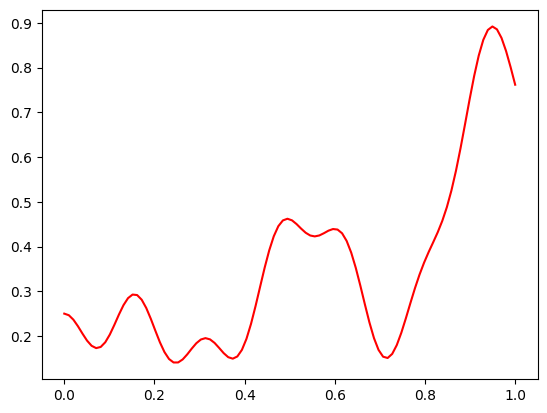

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(x,y,'r')
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 16, activation='relu', input_shape = (1,)),
    tf.keras.layers.Dense(units = 10, activation='relu'),
    tf.keras.layers.Dense(units = 1),
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

In [ ]:
hist = model.fit(x,y,epochs = 2000, verbose = 1, batch_size = 1 )

Epoch 1/2000
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0383
Epoch 2/2000
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0403
Epoch 3/2000
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0403
Epoch 4/2000
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0404
Epoch 5/2000
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0404
Epoch 6/2000
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0404
Epoch 7/2000
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0404
Epoch 8/2000
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0404
Epoch 9/2000
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0404
Epoch 10/2000
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0404
Epoch 11/2000
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 -

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


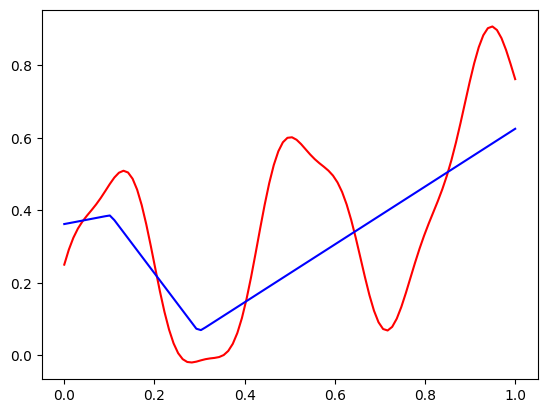

In [ ]:
y_pred = model.predict(x)
flg = plt.figure()
plt.plot(x,y,'r')
plt.plot(x,y_pred,'b')
plt.show()